In [179]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

# **New Data**

In [180]:
filename = os.path.join(os.getcwd(), "data/processed", "a_courseSections_2024-08-29.csv")
courseSections_df = pd.read_csv(filename, header = 0)

filename_second = os.path.join(os.getcwd(), "data/processed", "a_scores_2024-09-11.csv")
scores_df = pd.read_csv(filename_second, header = 0)

filename_third = os.path.join(os.getcwd(), "data/processed", "a_vendorUsage_2024-09-11.csv")
vendorUsage_df = pd.read_csv(filename_third, header = 0)

filename_fourth = os.path.join(os.getcwd(), "data/processed", "a_benchmarks_2024-09-11.csv")
benchmarks_df = pd.read_csv(filename_fourth, header = 0)

filename_fifth = os.path.join(os.getcwd(), "data/processed", "a_courseSectionRosters_2024-08-29.csv")
courseSectionsRosters_df = pd.read_csv(filename_fifth, header = 0)

filename_sixth = os.path.join(os.getcwd(), "data/processed", "a_schools_2024-08-29.csv")
schools_df = pd.read_csv(filename_sixth, header = 0)

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_29285/713448464.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionsRosters_df = pd.read_csv(filename_fifth, header = 0)


In [181]:
courseSections_df.head(10)

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222
5,40393,MATH 4,2015,222
6,40394,SOC ST 4,2015,222
7,40395,HmroomPK6,2015,222
8,40396,READING 4,2015,222
9,40397,MATH 4,2015,222


In [182]:
row = courseSections_df.loc[courseSections_df['id'] == 39975]
row

,id,vanityId,year,schoolId
8250,39975,MathGrade 4,2015,232


In [183]:
courseSections_df.shape

(17662, 4)

In [184]:
courseSections_df.schoolId.unique()

array([222, 223, 224, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236,
       237, 247, 248, 249])

In [185]:
courseSections_df.vanityId.nunique()

1047

In [186]:
courseSections_df.id.nunique()

17662

In [187]:
print(courseSections_df.isnull().sum())

id          0
vanityId    0
year        0
schoolId    0
dtype: int64


In [188]:
courseSections_df.isna().sum() > 0

id          False
vanityId    False
year        False
schoolId    False
dtype: bool

In [189]:
courseSectionsRosters_df.head(10)

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN
5,1047738,39975,45429,4,NaN
6,1047740,39975,56118,4,NaN
7,1047746,39975,45438,4,NaN
8,1047751,39975,45444,4,NaN
9,1047752,39975,45445,4,NaN


In [190]:
courseSectionsRosters_df.courseSectionId.nunique()

17659

In [191]:
print(type(list(courseSectionsRosters_df.courseSectionId)))

<class 'list'>


In [192]:
print(courseSectionsRosters_df['courseSectionId'].isin(courseSections_df['id']).all())

True


Merge courseSections and courseSectionsRosters by id - all courseSectionRosters courseSectionId values are in courseSections. 

In [193]:
count = 0
id_array = []
courseSectionsIds = list(courseSections_df.id)
courseSectionRostersIds = list(courseSectionsRosters_df.courseSectionId)
for id in courseSectionsIds:
    if id in courseSectionRostersIds:
        id_array.append(id)
        print(id)
    if count == 10:
        break
    count += 1

print(len(id_array))

40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
11


In [194]:
scores_df.head(10)

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44775,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,44776,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,44776,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,44776,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,44777,6,2017,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


I have a dataframe called scores_df with a studentId column and a studentLevel column. How do I find how many duplicate studentId values there are in scores_df that have at least two different studentLevel data corresponding with it? So to clarify, if studentId 44 has a studentLevel value of 9 and another studentLevel value of 8, it would be counted. 

In [195]:
# Group by studentId and aggregate unique studentLevel counts
duplicate_levels = (
    scores_df.groupby('studentId')['studentLevel'].nunique()  # Count unique studentLevel values for each studentId
)

# Filter for studentIds with at least 2 different studentLevels
duplicate_student_ids = duplicate_levels[duplicate_levels >= 2]

# Count how many studentIds meet the criteria
count_of_duplicates = duplicate_student_ids.count()

print(count_of_duplicates)


57528


In [196]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [197]:
scores_df.shape

(303750, 69)

In [198]:
scores_df.studentId.nunique()

125223

Is there a way to find which student ID belongs at which school?

In [199]:
benchmarks_df

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


In [200]:
testTypes = benchmarks_df.dataSource.unique()
testTypes

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)

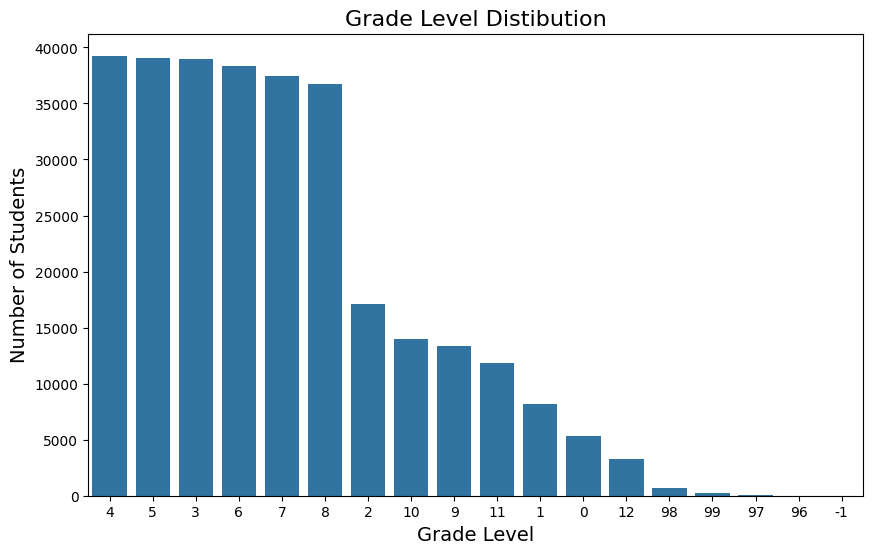

In [201]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_df, x='studentLevel', order=scores_df['studentLevel'].value_counts().index)

plt.title('Grade Level Distibution', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

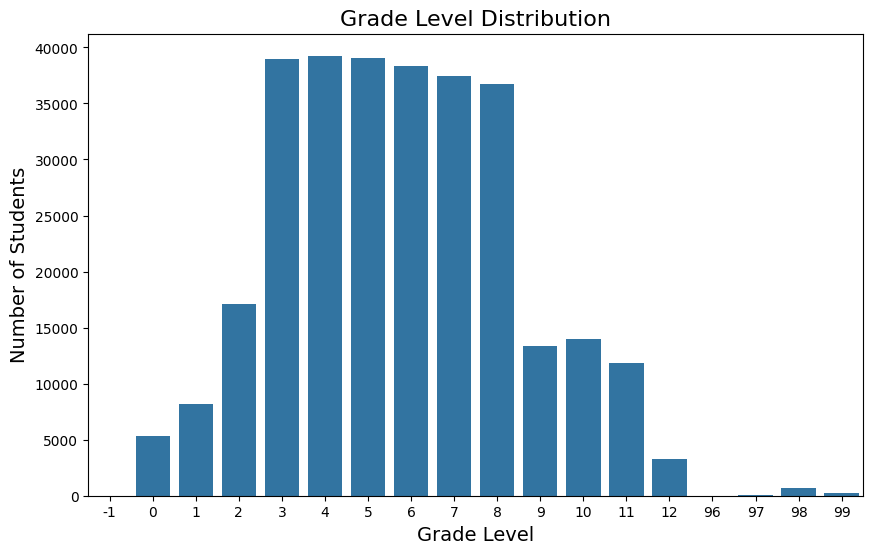

In [202]:
plt.figure(figsize=(10, 6))

# Sort the unique student levels in ascending order
order = sorted(scores_df['studentLevel'].unique())

sns.countplot(data=scores_df, x='studentLevel', order=order)

plt.title('Grade Level Distribution', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

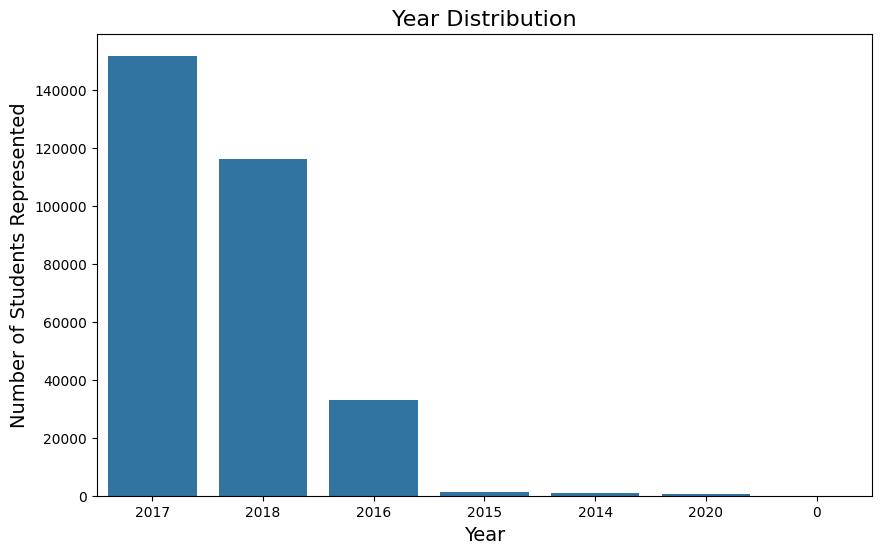

In [203]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_df, x='year', order=scores_df['year'].value_counts().index)

plt.title('Year Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Students Represented', fontsize=14)

plt.show()

In [204]:
student_counts = scores_df['studentId'].value_counts()

duplicate_students = student_counts[student_counts > 1]

total_dupes = duplicate_students.count()

print("Total Duplicates: ", total_dupes)

Total Duplicates:  82751


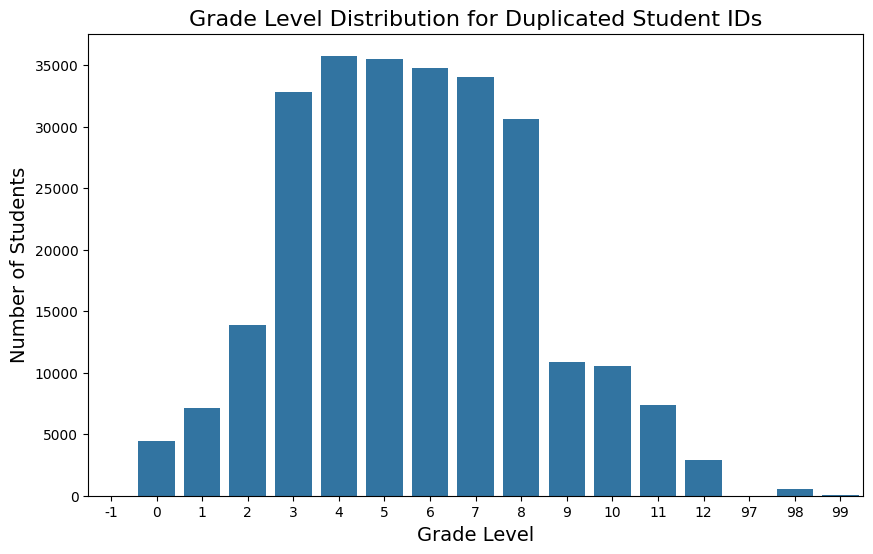

In [205]:

duplicate_student_ids = duplicate_students.index
duplicated_entries = scores_df[scores_df['studentId'].isin(duplicate_student_ids)]


plt.figure(figsize=(10, 6))
sns.countplot(data=duplicated_entries, x='studentLevel', order=sorted(duplicated_entries['studentLevel'].unique()))

plt.title('Grade Level Distribution for Duplicated Student IDs', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

In [206]:
vendorUsage_df.head(10)

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0
5,11895,72609,44810,0,2018,1,0
6,11896,72609,44811,0,2018,1,0
7,11897,72609,44812,0,2018,1,0
8,11898,72609,44813,0,2018,1,0
9,11899,72609,44814,0,2018,1,0


In [207]:
vendorUsage_df.shape

(158007, 7)

In [208]:
vendorUsage_df.usageTypeId.unique()

array([ 1,  2,  3,  5,  6,  4, 10, 11, 12,  7,  8,  9, 14])

In [209]:
vendorUsage_df.vendorId.nunique()

23

In [210]:
cleanedVendorUsage_df = vendorUsage_df[vendorUsage_df['active'] != 0]

In [211]:
schools_df.head(10)

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,NaN,0
1,223,Middle School A,45,8,EMS,1,NaN,0
2,224,High School A,45,10,ECHS,1,NaN,0
3,225,Junior High B,45,12,ECJH,1,NaN,0
4,226,Elementary School B,45,18,HES,1,NaN,0
5,227,Middle School C,45,19,HMS,1,NaN,0
6,228,High School B,45,20,HHS,1,NaN,0
7,229,Middle School D,45,23,MJH,1,NaN,0
8,230,Elementary School C,45,30,RSE,1,NaN,0
9,231,Elementary School D,45,35,CES,1,NaN,0


In [212]:
benchmarks_df.head(10)

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


Checking connections between dataframes

In [213]:
print(courseSectionsRosters_df['studentId'].isin(scores_df['studentId']).sum())

484714


How do I create a list of which studentId values show up in scores_df, courseSectionsRosters_df, and vendorUsage_df?

In [214]:
print(scores_df['studentId'].isin(courseSectionsRosters_df['studentId']).sum())

34316


In [215]:
print(vendorUsage_df['studentId'].isin(scores_df['studentId']).all())

False


# **Merging Dataframes**

First have to make sure both dataframes have the same column name

In [216]:
copy_courseSections_df = courseSections_df.copy()
copy_courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


In [217]:
copy_courseSections_df.rename(columns={'id': 'courseSectionId'}, inplace=True)
copy_courseSections_df.head()

,courseSectionId,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


In [218]:
all_present = courseSectionsRosters_df['courseSectionId'].isin(copy_courseSections_df['courseSectionId']).all()
all_present

np.True_

In [219]:
mergedCourseSections_df = pd.merge(courseSectionsRosters_df, copy_courseSections_df, how = 'left')
mergedCourseSections_df.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId,year,schoolId
0,1047696,39975,45333,4,NaN,MathGrade 4,2015,232
1,1047704,39975,56116,4,NaN,MathGrade 4,2015,232
2,1047706,39975,45345,4,NaN,MathGrade 4,2015,232
3,1047715,39975,45400,4,NaN,MathGrade 4,2015,232
4,1047729,39975,45413,4,NaN,MathGrade 4,2015,232


In [220]:
missing_values = mergedCourseSections_df.isnull().sum()
missing_values

id                      0
courseSectionId         0
studentId               0
studentLevel            0
ticket             610343
vanityId                0
year                    0
schoolId                0
dtype: int64

In [221]:
mergedCourseSections_df.drop(columns=['ticket'], inplace=True)
mergedCourseSections_df.isnull().sum()

id                 0
courseSectionId    0
studentId          0
studentLevel       0
vanityId           0
year               0
schoolId           0
dtype: int64

In [222]:
mergedCourseSections_df.shape

(612241, 7)

# **Dataframes all together (for reference)**

In [223]:
mergedCourseSections_df.head()

,id,courseSectionId,studentId,studentLevel,vanityId,year,schoolId
0,1047696,39975,45333,4,MathGrade 4,2015,232
1,1047704,39975,56116,4,MathGrade 4,2015,232
2,1047706,39975,45345,4,MathGrade 4,2015,232
3,1047715,39975,45400,4,MathGrade 4,2015,232
4,1047729,39975,45413,4,MathGrade 4,2015,232


In [224]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Scores experimentation**

In [225]:

# Set display options to show more columns
pd.set_option('display.max_columns', None)

# Now display the first row
first_row = scores_df.iloc[0]
print(first_row)

# Reset the option if needed
pd.reset_option('display.max_columns')

first_row_df = scores_df.iloc[[0]]
print(first_row_df.to_string(index=False))  # This will show all columns without truncation



studentId               44774.0
studentLevel                9.0
year                     2018.0
measurementTypeId           6.0
subgroup_specialEd          0.0
                         ...   
value_gcaInfo               0.0
value_gcaNar                0.0
value_gcaOpin               0.0
value_aimsWebMath           0.0
value_aimsWebReading        0.0
Name: 0, Length: 69, dtype: float64
 studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  subgroup_ell  subgroup_bottom25  value_actMathScore  value_actEnglishScore  value_actReadingScore  value_actScienceScore  value_actCompositeScore  value_nweaMath  value_nweaReading  value_nweaEnglish  value_iReadyMath  value_iReadyReading  value_actMasteryComposite  value_actMasteryReading  value_actMasteryMath  value_actMasteryScience  value_actMasteryEnglish  value_nweaELA  value_scantronMath  value_scantronReading  value_mapMath  value_mapEnglish  value_mapReading  value_map

In [226]:
# Get the first row
first_row = scores_df.iloc[0]

# Filter for nonzero values
nonzero_columns = first_row[first_row != 0]

# Display the nonzero columns
print(nonzero_columns)


studentId            44774.0
studentLevel             9.0
year                  2018.0
measurementTypeId        6.0
Name: 0, dtype: float64


In [227]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [228]:
exclude_columns = [
    'studentId', 'studentLevel', 'year', 'measurementTypeId',
    'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
    'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25'
]

tests = [col for col in scores_df.columns if col not in exclude_columns]

In [229]:
mask = (scores_df[tests] == 0).all(axis=1)
editedScores_df = scores_df[~mask]

In [230]:
all_zero_columns = scores_df.columns[(scores_df == 0).all()]
all_zero_columns

Index(['value_nweaEnglish', 'value_mapEnglish', 'value_scantronAlgebra',
       'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience',
       'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 'value_aimsWebMath',
       'value_aimsWebReading'],
      dtype='object')

In [231]:
editedScores_df = scores_df.drop(columns=[col for col in all_zero_columns if col in scores_df.columns])

In [232]:
editedScores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_SocialMilestones
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0


In [234]:
vendorUsage_df.vendorId.unique()

array([72609, 11333, 39195, 27172, 61673, 37017, 36130, 62382, 62509,
       62508, 37269, 25405, 52447, 52448, 61544,  7273, 63431, 63432,
       22410, 63616, 23165,  7035, 11464])

In [235]:
vendorUsage_df.usageTypeId.unique()

array([ 1,  2,  3,  5,  6,  4, 10, 11, 12,  7,  8,  9, 14])

In [236]:
vendorUsage_df.shape

(158007, 7)

In [237]:
vendorUsage_df.studentId.nunique()

44176

In [238]:
benchmarks_df.head()

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0


In [239]:
benchmarks_df.dataSource.unique()

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)

# **Experimentation with Improper Data**

For the most part, followed along the Unit 6 Clustering Assignment

In [240]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
# Create a new dataframe with duplicate studentId values dropped
unique_scores_df = scores_df.drop_duplicates(subset='studentId', keep='first')
unique_scores_df.head()


,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,44776,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,44777,6,2017,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,44778,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
unique_scores_df.shape

(125223, 69)

In [243]:
# Create a new dataframe with duplicate studentId values dropped
unique_vendorUsage_df = vendorUsage_df.drop_duplicates(subset='studentId', keep='first')
unique_vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0


In [244]:
unique_vendorUsage_df.shape

(44176, 7)

In [245]:
# Merge on studentId and year
merged_df = pd.merge(unique_scores_df, unique_vendorUsage_df, on=['studentId', 'year'], how='inner')
merged_df.head()


,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading,id,vendorId,active,usageTypeId,weeklyUsageMinutes
0,44783,7,2018,6,0,0,0,0,0,1,...,0,0,0,0,0,11891,72609,0,1,0
1,44784,6,2018,5,0,0,0,0,0,0,...,0,0,0,0,0,11892,72609,0,1,0
2,44810,7,2018,4,1,0,0,0,0,1,...,0,0,0,0,0,11895,72609,0,1,0
3,44812,7,2018,6,0,1,0,0,0,0,...,0,0,0,0,0,11897,72609,0,1,0
4,44813,7,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,11898,72609,0,1,0


In [246]:
merged_df.shape

(22073, 74)

In [247]:
# Remove columns that contain all zero values
merged_df = merged_df.loc[:, (merged_df != 0).any(axis=0)]
merged_df.shape



(22073, 33)

In [248]:
merged_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,...,value_LeapBlScale,value_LeapE3Scale,value_E1Scale,value_dibelsReading,value_LEAPSocSci,value_starReading,value_starMath,id,vendorId,usageTypeId
0,44783,7,2018,6,0,0,1,0.0,0.0,0.0,...,0,0,0,0,0,0,2644,11891,72609,1
1,44784,6,2018,5,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,11892,72609,1
2,44810,7,2018,4,1,0,1,0.0,0.0,0.0,...,0,0,0,0,0,0,2548,11895,72609,1
3,44812,7,2018,6,0,1,0,0.0,0.0,0.0,...,0,0,0,0,0,0,2284,11897,72609,1
4,44813,7,2018,6,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,11898,72609,1


In [249]:
merged_df.drop(columns=['id'], inplace=True)

In [250]:
merged_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_iReadyMath',
       'value_iReadyReading', 'value_scantronMath', 'value_scantronReading',
       'value_scantronScience', 'value_scantronLanguage', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale',
       'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale',
       'value_E1Scale', 'value_dibelsReading', 'value_LEAPSocSci',
       'value_starReading', 'value_starMath', 'vendorId', 'usageTypeId'],
      dtype='object')

In [251]:
features = ['studentId', 'studentLevel',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_iReadyMath',
       'value_iReadyReading', 'value_scantronMath', 'value_scantronReading',
       'value_scantronScience', 'value_scantronLanguage', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale',
       'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale',
       'value_E1Scale', 'value_dibelsReading', 'value_LEAPSocSci',
       'value_starReading', 'value_starMath', 'vendorId', 'usageTypeId']

In [252]:
merged_df = merged_df[features]
merged_df.columns
merged_df.shape

(22073, 30)

In [253]:
merged_df.set_index('studentId', inplace=True)

In [254]:
nan_count = np.sum(merged_df.isnull(), axis = 0)
nan_count

studentLevel               0
subgroup_specialEd         0
subgroup_lunchStatus       0
subgroup_bottom25          0
value_actMathScore         0
value_actEnglishScore      0
value_actReadingScore      0
value_actScienceScore      0
value_actCompositeScore    0
value_iReadyMath           0
value_iReadyReading        0
value_scantronMath         0
value_scantronReading      0
value_scantronScience      0
value_scantronLanguage     0
value_LeapELAScale         0
value_LeapMathScale        0
value_LeapALScale          0
value_LeapE2Scale          0
value_LeapGmScale          0
value_LeapBlScale          0
value_LeapE3Scale          0
value_E1Scale              0
value_dibelsReading        0
value_LEAPSocSci           0
value_starReading          0
value_starMath             0
vendorId                   0
usageTypeId                0
dtype: int64

In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
print(merged_df.dtypes)

studentLevel                 int64
subgroup_specialEd           int64
subgroup_lunchStatus         int64
subgroup_bottom25            int64
value_actMathScore         float64
value_actEnglishScore      float64
value_actReadingScore      float64
value_actScienceScore      float64
value_actCompositeScore    float64
value_iReadyMath             int64
value_iReadyReading          int64
value_scantronMath         float64
value_scantronReading        int64
value_scantronScience        int64
value_scantronLanguage       int64
value_LeapELAScale           int64
value_LeapMathScale          int64
value_LeapALScale            int64
value_LeapE2Scale            int64
value_LeapGmScale            int64
value_LeapBlScale            int64
value_LeapE3Scale            int64
value_E1Scale                int64
value_dibelsReading          int64
value_LEAPSocSci             int64
value_starReading            int64
value_starMath               int64
vendorId                     int64
usageTypeId         

In [257]:
# 1. Create a StandardScaler object and save the result to variable scaler.
scaler = StandardScaler()

# 2. Extract numerical features from DataFrame df

df_to_scale = merged_df.select_dtypes(['float', 'int'])
# 3. Call the scaler.fit_transform() method to fit the scaler to data_to_scale
# and tranform the data. Save the result to transformed_data.

transformed_data = scaler.fit_transform(df_to_scale)

#4. Create new DataFrame df_scaled
df_scaled = pd.DataFrame(transformed_data, columns = df_to_scale.columns, index = df_to_scale.index)

df_scaled


,studentLevel,subgroup_specialEd,subgroup_lunchStatus,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_iReadyMath,...,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_E1Scale,value_dibelsReading,value_LEAPSocSci,value_starReading,value_starMath,vendorId,usageTypeId
studentId,,,,,,,,,,,,,,,,,,,,,
44783,0.174741,-0.112527,-0.375524,5.579386,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,-0.406321,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,2.749683,1.428400,-0.640057
44784,0.062011,-0.112527,-0.375524,-0.179231,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,-0.406321,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,-0.402985,1.428400,-0.640057
44810,0.174741,8.886768,-0.375524,5.579386,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,-0.406321,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,2.635214,1.428400,-0.640057
44812,0.174741,-0.112527,2.662945,-0.179231,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,-0.406321,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,2.320425,1.428400,-0.640057
44813,0.174741,-0.112527,-0.375524,-0.179231,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,-0.406321,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,-0.402985,1.428400,-0.640057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167456,-0.501639,-0.112527,-0.375524,-0.179231,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,2.319114,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,-0.402985,-0.368174,-0.640057
167457,0.174741,-0.112527,-0.375524,-0.179231,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,3.156164,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,-0.402985,-0.368174,0.120739
183372,-0.163449,-0.112527,-0.375524,-0.179231,-0.101771,-0.099268,-0.098461,-0.100293,-0.100839,2.580274,...,-0.151532,-0.162416,-0.175017,-0.180399,-0.168453,-0.439004,-0.132248,-0.402985,0.885352,0.881535


<Axes: ylabel='studentId'>

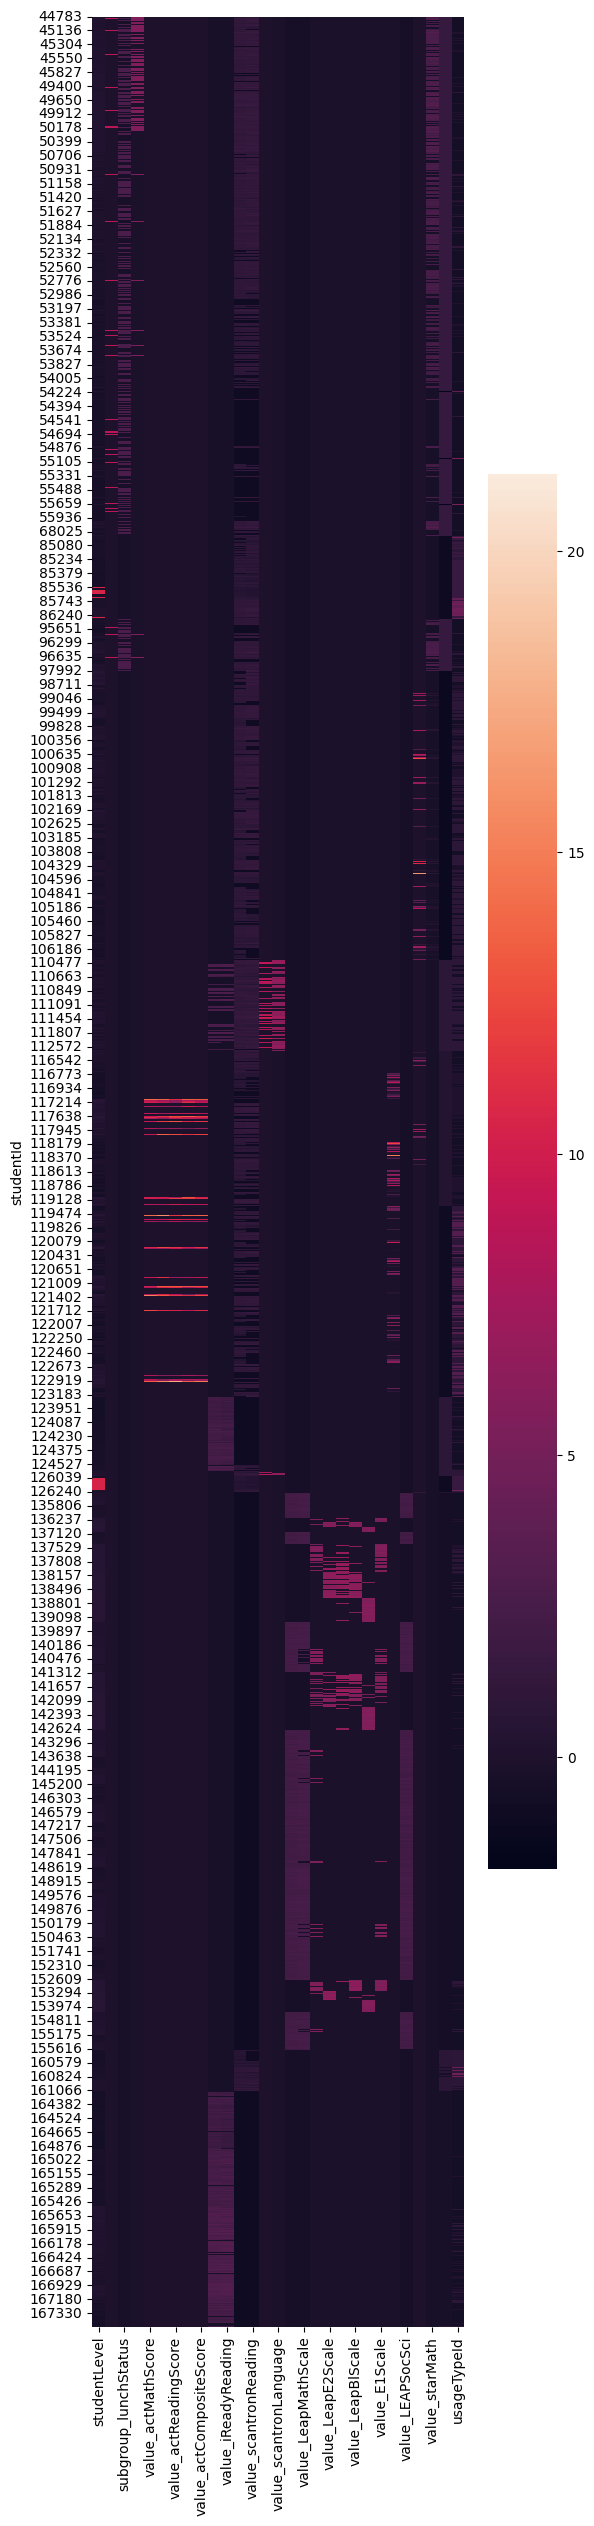

In [258]:
plt.figure(figsize = (6,30))
sns.heatmap(df_scaled)

In [259]:
K = 5

In [260]:
from sklearn.cluster import KMeans

In [261]:
kcluster = KMeans(n_clusters=K)
kcluster.fit(df_scaled)

KMeans(n_clusters=5)

In [262]:
print(kcluster.labels_)

[1 1 1 ... 4 4 4]


In [263]:
df_clustered = merged_df.copy()
df_clustered['klabel'] = kcluster.labels_
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['klabel'] = kcluster.labels_

In [264]:
df_clustered

,studentLevel,subgroup_specialEd,subgroup_lunchStatus,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_iReadyMath,...,value_LeapBlScale,value_LeapE3Scale,value_E1Scale,value_dibelsReading,value_LEAPSocSci,value_starReading,value_starMath,vendorId,usageTypeId,klabel
studentId,,,,,,,,,,,,,,,,,,,,,
44783,7,0,0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,2644,72609,1,1
44784,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,72609,1,1
44810,7,1,0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,2548,72609,1,1
44812,7,0,1,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,2284,72609,1,1
44813,7,0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,72609,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167456,1,0,0,0,0.0,0.0,0.0,0.0,0.0,407,...,0,0,0,0,0,0,0,39195,1,4
167457,7,0,0,0,0.0,0.0,0.0,0.0,0.0,532,...,0,0,0,0,0,0,0,39195,2,4
183372,4,0,0,0,0.0,0.0,0.0,0.0,0.0,446,...,0,0,0,0,0,0,0,62509,3,4


In [265]:
specified_features = ['studentLevel', 'subgroup_specialEd', 'subgroup_lunchStatus', 'supgroup_bottom25', 'vendorId', 'value_starReading']

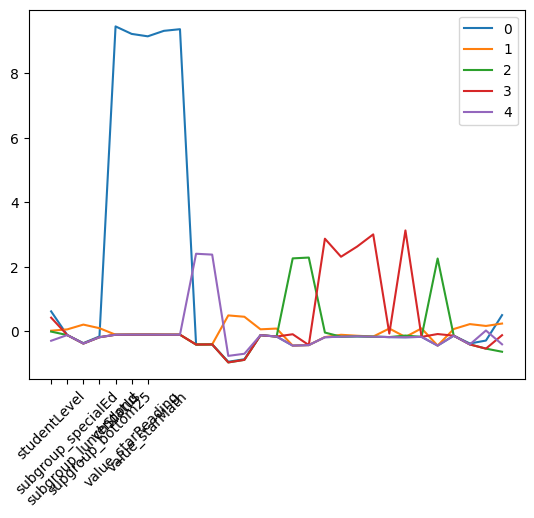

In [274]:
num_clusters = 5
for i in range(num_clusters):
    plt.plot(kcluster.cluster_centers_[i], label=i)
plt.xticks(range(len(specified_features)), specified_features, rotation=45)
plt.legend()
